In [1]:
using PyPlot

# http://lib.stat.cmu.edu/datasets/boston
# predicting the median value of owner-occupied homes in $1000's

include("real_experiments_boston.jl")

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:120
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:158


sigma is 2.0
k is 3
num samples 506
[0.203319, 0.61365, 0.0722331, 0.0645136, 0.0, 0.014169, 0.00397988, 0.0185444, 0.00959047, 0.0, 0.0, 0.0, 0.0]
num leaves merging 22
mse merging 4.303461415224814
mse cart 6.779892514383527
time merging 0.109691448
time cart 0.003395586


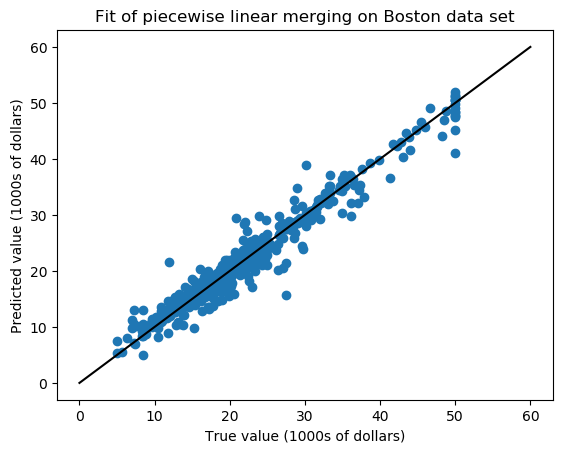

In [2]:
plt.scatter(y, yhat_merging) 
plt.plot([0,60],[0,60],"black")
xlabel("True value (1000s of dollars)")
ylabel("Predicted value (1000s of dollars)")
title("Fit of piecewise linear merging on Boston data set")
plt.show()

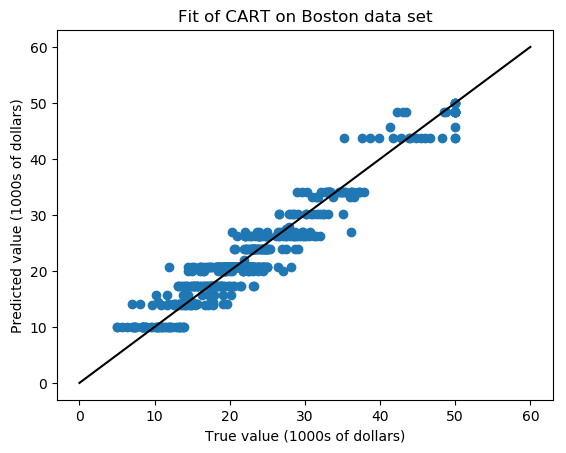

In [3]:
plt.scatter(y, yhat_cart) 
plt.plot([0,60],[0,60],"black")
xlabel("True value (1000s of dollars)")
ylabel("Predicted value (1000s of dollars)")
title("Fit of CART on Boston data set")
plt.show()

In [4]:
@sk_import metrics: r2_score
println(r2_score(y,yhat_merging))
println(r2_score(y, yhat_cart))


0.9490229324676387
0.9196881288757124


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:120
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:158


In [5]:
mses

Dict{String,Array{Float64,2}} with 2 entries:
  "merging" => [7.5126 5.50028 … 2.02111 1.01586; 7.5126 5.50028 … 2.81413 1.54…
  "cart"    => [9.92245 7.30405 … 4.03369 2.91863; 9.92245 7.30405 … 4.81165 3.…

In [6]:
algo_colors = Dict([("cart", "blue"), ("merging", "orange")])

Dict{String,String} with 2 entries:
  "merging" => "orange"
  "cart"    => "blue"

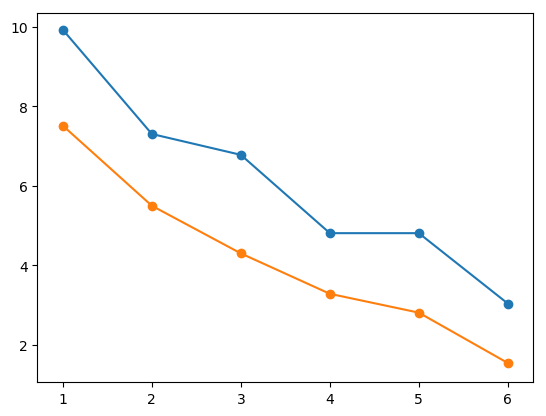

In [7]:
sigma_index = 2
plt.scatter(k_vals,mses["cart"][sigma_index ,:])
plt.plot(k_vals, mses["cart"][sigma_index ,:])
plt.scatter(k_vals,mses["merging"][sigma_index ,:])
plt.plot(k_vals, mses["merging"][sigma_index ,:])
plt.show()

#plot(n_vals, 200.0 ./ n_vals, label="C/n")
#plot(n_vals, 5.0 ./ sqrt(n_vals), label="C/sqrt(n)", color="olive")
#title("MSE with k=16 piecewise in 2-dimensions")
#yscale("log")
#xscale("log")
#xlabel("n")
#ylabel("MSE")
#legend(bbox_to_anchor=(1.05, .7), loc=2, borderaxespad=0.)
#plt.scatter(y, yhat_merging) 
#plt.show()

In [8]:
mses["cart"]

6×6 Array{Float64,2}:
 9.92245  7.30405  6.77989  5.61408  4.03369  2.91863
 9.92245  7.30405  6.77989  4.81165  4.81165  3.04257
 9.92245  7.30405  5.61408  4.57979  3.46157  2.98021
 9.92245  7.92231  6.77989  5.61408  4.13434  3.31431
 9.92245  8.25501  6.54274  5.61408  4.13434  3.31431
 9.92245  8.25501  6.54274  4.6949   3.7465   3.38763

In [9]:
mses["merging"]

6×6 Array{Float64,2}:
 7.5126  5.50028  4.30346  3.40458  2.02111  1.01586
 7.5126  5.50028  4.30346  3.28781  2.81413  1.54797
 7.5126  5.50028  4.90983  4.01095  3.36207  2.56905
 7.5126  6.92215  6.92215  6.02327  5.37439  3.36207
 7.5126  7.5126   6.61371  6.02327  5.37439  3.36207
 7.5126  7.5126   6.61371  5.96483  3.95252  3.95252